In [1]:
# load dataset
from sklearn import datasets
iris = datasets.load_iris()
print(list(iris))
print('\n* Description:', iris.DESCR)
print('\n* Features:', iris.feature_names)
print('\n* Data', iris.data)
print('\n* Target:', iris.target, iris.target_names)

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']

* Description: .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= 

In [4]:
# create dataframe from iris
import pandas as pd
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df # display dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


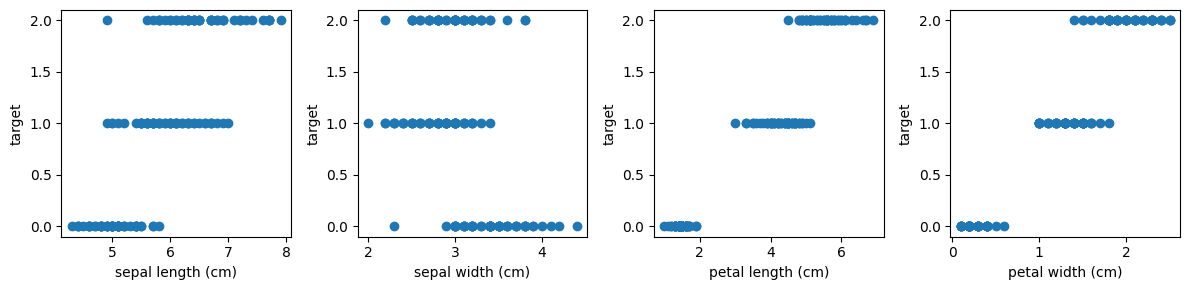

In [6]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1, 4 , figsize=(12,3))
for i in range(4):
    column = df.columns[i]
    ax[i].scatter(df[column],df['target'])
    ax[i].set_xlabel(column)
    ax[i].set_ylabel('target')
plt.tight_layout()
plt.show()

In [13]:
# create  dataset from dataframe
X = df.loc[:, 'sepal length (cm)':'petal width (cm)']
y = df.loc[:, 'target']
print('\n(X_data, y_data):\n', X , '\n',y)
# train 80 test 20
from sklearn import model_selection
X_train , X_test ,y_train , y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1234)
print('\n(X_train, y_train):\n', X_train , '\n',y_train)
print('\n(X_test, y_test):\n', X_test , '\n',y_test)


(X_data, y_data):
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns] 
 0      0
1      0


1.0
1.0


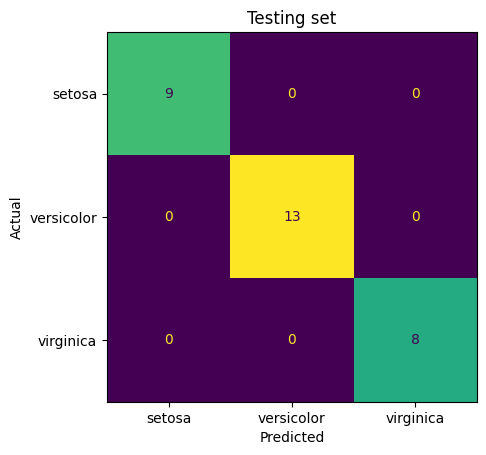

In [14]:
# train
from sklearn import neighbors
model = neighbors.KNeighborsClassifier(n_neighbors=3, p=2)
model.fit(X_train, y_train)
# evaluation
from sklearn import metrics
y_test_hat = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_test_hat))
print(metrics.f1_score(y_test, y_test_hat, average='macro'))
# visualization
import matplotlib.pyplot as plt
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_test_hat, labels=[0,1,2],display_labels=iris.target_names,colorbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Testing set')
plt.show() 

1.0
1.0


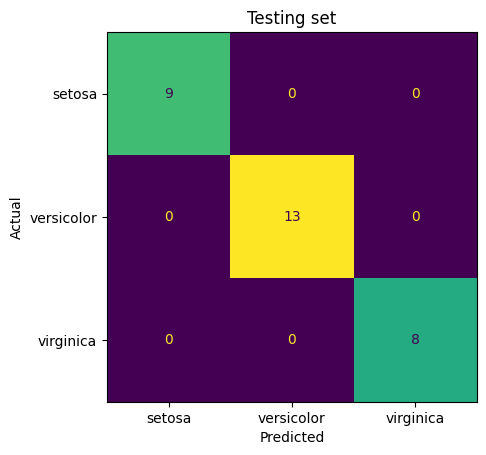

In [18]:
# Gaussian training
from sklearn import naive_bayes
model = naive_bayes.GaussianNB()
model.fit(X_train, y_train)
# evaluation
from sklearn import metrics
y_test_hat = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_test_hat))
print(metrics.f1_score(y_test, y_test_hat, average='macro'))
# visualization
import matplotlib.pyplot as plt
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_test_hat, labels=[0,1,2],display_labels=iris.target_names,colorbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Testing set')
plt.show() 


1.0
1.0


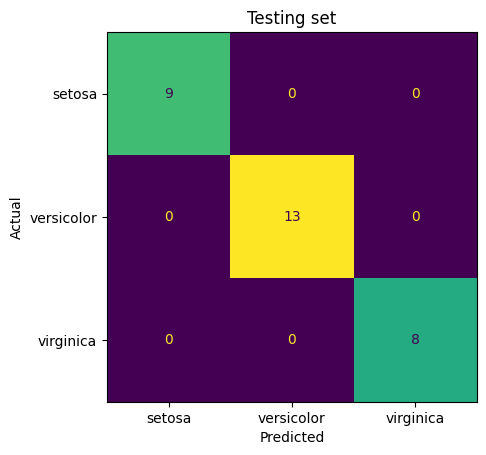

In [19]:
# Decision tree training
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)
# evaluation
from sklearn import metrics
y_test_hat = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_test_hat))
print(metrics.f1_score(y_test, y_test_hat, average='macro'))
# visualization
import matplotlib.pyplot as plt
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_test_hat, labels=[0,1,2],display_labels=iris.target_names,colorbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Testing set')
plt.show() 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1.0
1.0


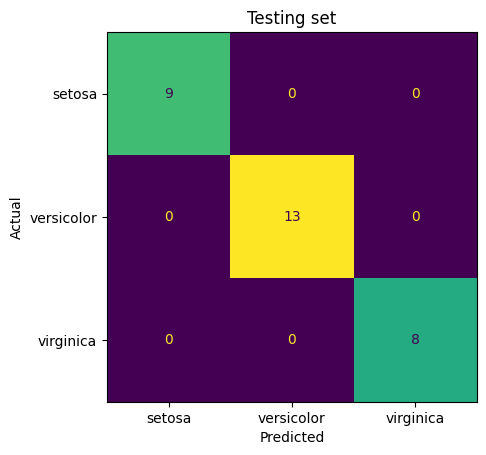

In [23]:
# convert
from keras import utils
Y_train = utils.to_categorical(y_train, 3)
Y_test = utils.to_categorical(y_test, 3)
# training epchos =1000
from keras import models ,layers, losses, optimizers
model = models.Sequential([
        layers.Dense(units=4, activation='relu', name='hidden'),
        layers.Dense(units=3, activation='softmax', name='output')
])
model.compile(
    loss=losses.CategoricalCrossentropy(),
    optimizer=optimizers.Adam(learning_rate=0.01),
)
model.fit(X_train, Y_train, epochs=1000, verbose=0)
# evaluation
from sklearn import metrics
Y_test_hat = (model.predict(X_test) >= 0.5).astype(int)
print(metrics.accuracy_score(Y_test, Y_test_hat))
print(metrics.f1_score(Y_test, Y_test_hat, average='macro'))
# visualization
import matplotlib.pyplot as plt
metrics.ConfusionMatrixDisplay.from_predictions(Y_test.argmax(axis=1), Y_test_hat.argmax(axis=1), labels=[0,1,2],display_labels=iris.target_names,colorbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Testing set')
plt.show()

